### Do the initial setup

In [10]:
%pip install ultralytics

from IPython import display

display.clear_output()

import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.1.38 🚀 Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 15981MiB)
Setup complete ✅ (32 CPUs, 31.0 GB RAM, 1225.4/1811.5 GB disk)


In [7]:
from glob import glob
from ultralytics import YOLO
from IPython.display import display, Image

## Initialize the Model and Start training 

In [3]:
# Load the pretrained yolo-v8-cls (classification)
model = YOLO("yolov8n-cls.pt")
result = model.train(data="./data", epochs=300, imgsz=224)

New https://pypi.org/project/ultralytics/8.2.32 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.38 🚀 Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 15981MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=./data, epochs=300, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

### Evaluation on test data

Ultralytics YOLOv8.1.38 🚀 Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 15981MiB)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: /home/mohanakrishna/Development/GSSoC/terrain classification/Dataset/Landscape Classification/train... found 10000 images in 5 classes ✅ 
val: /home/mohanakrishna/Development/GSSoC/terrain classification/Dataset/Landscape Classification/val... found 1500 images in 5 classes ✅ 
test: None...
val: Scanning /home/mohanakrishna/Development/GSSoC/terrain classification/Datas
/home/mohanakrishna/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potenti

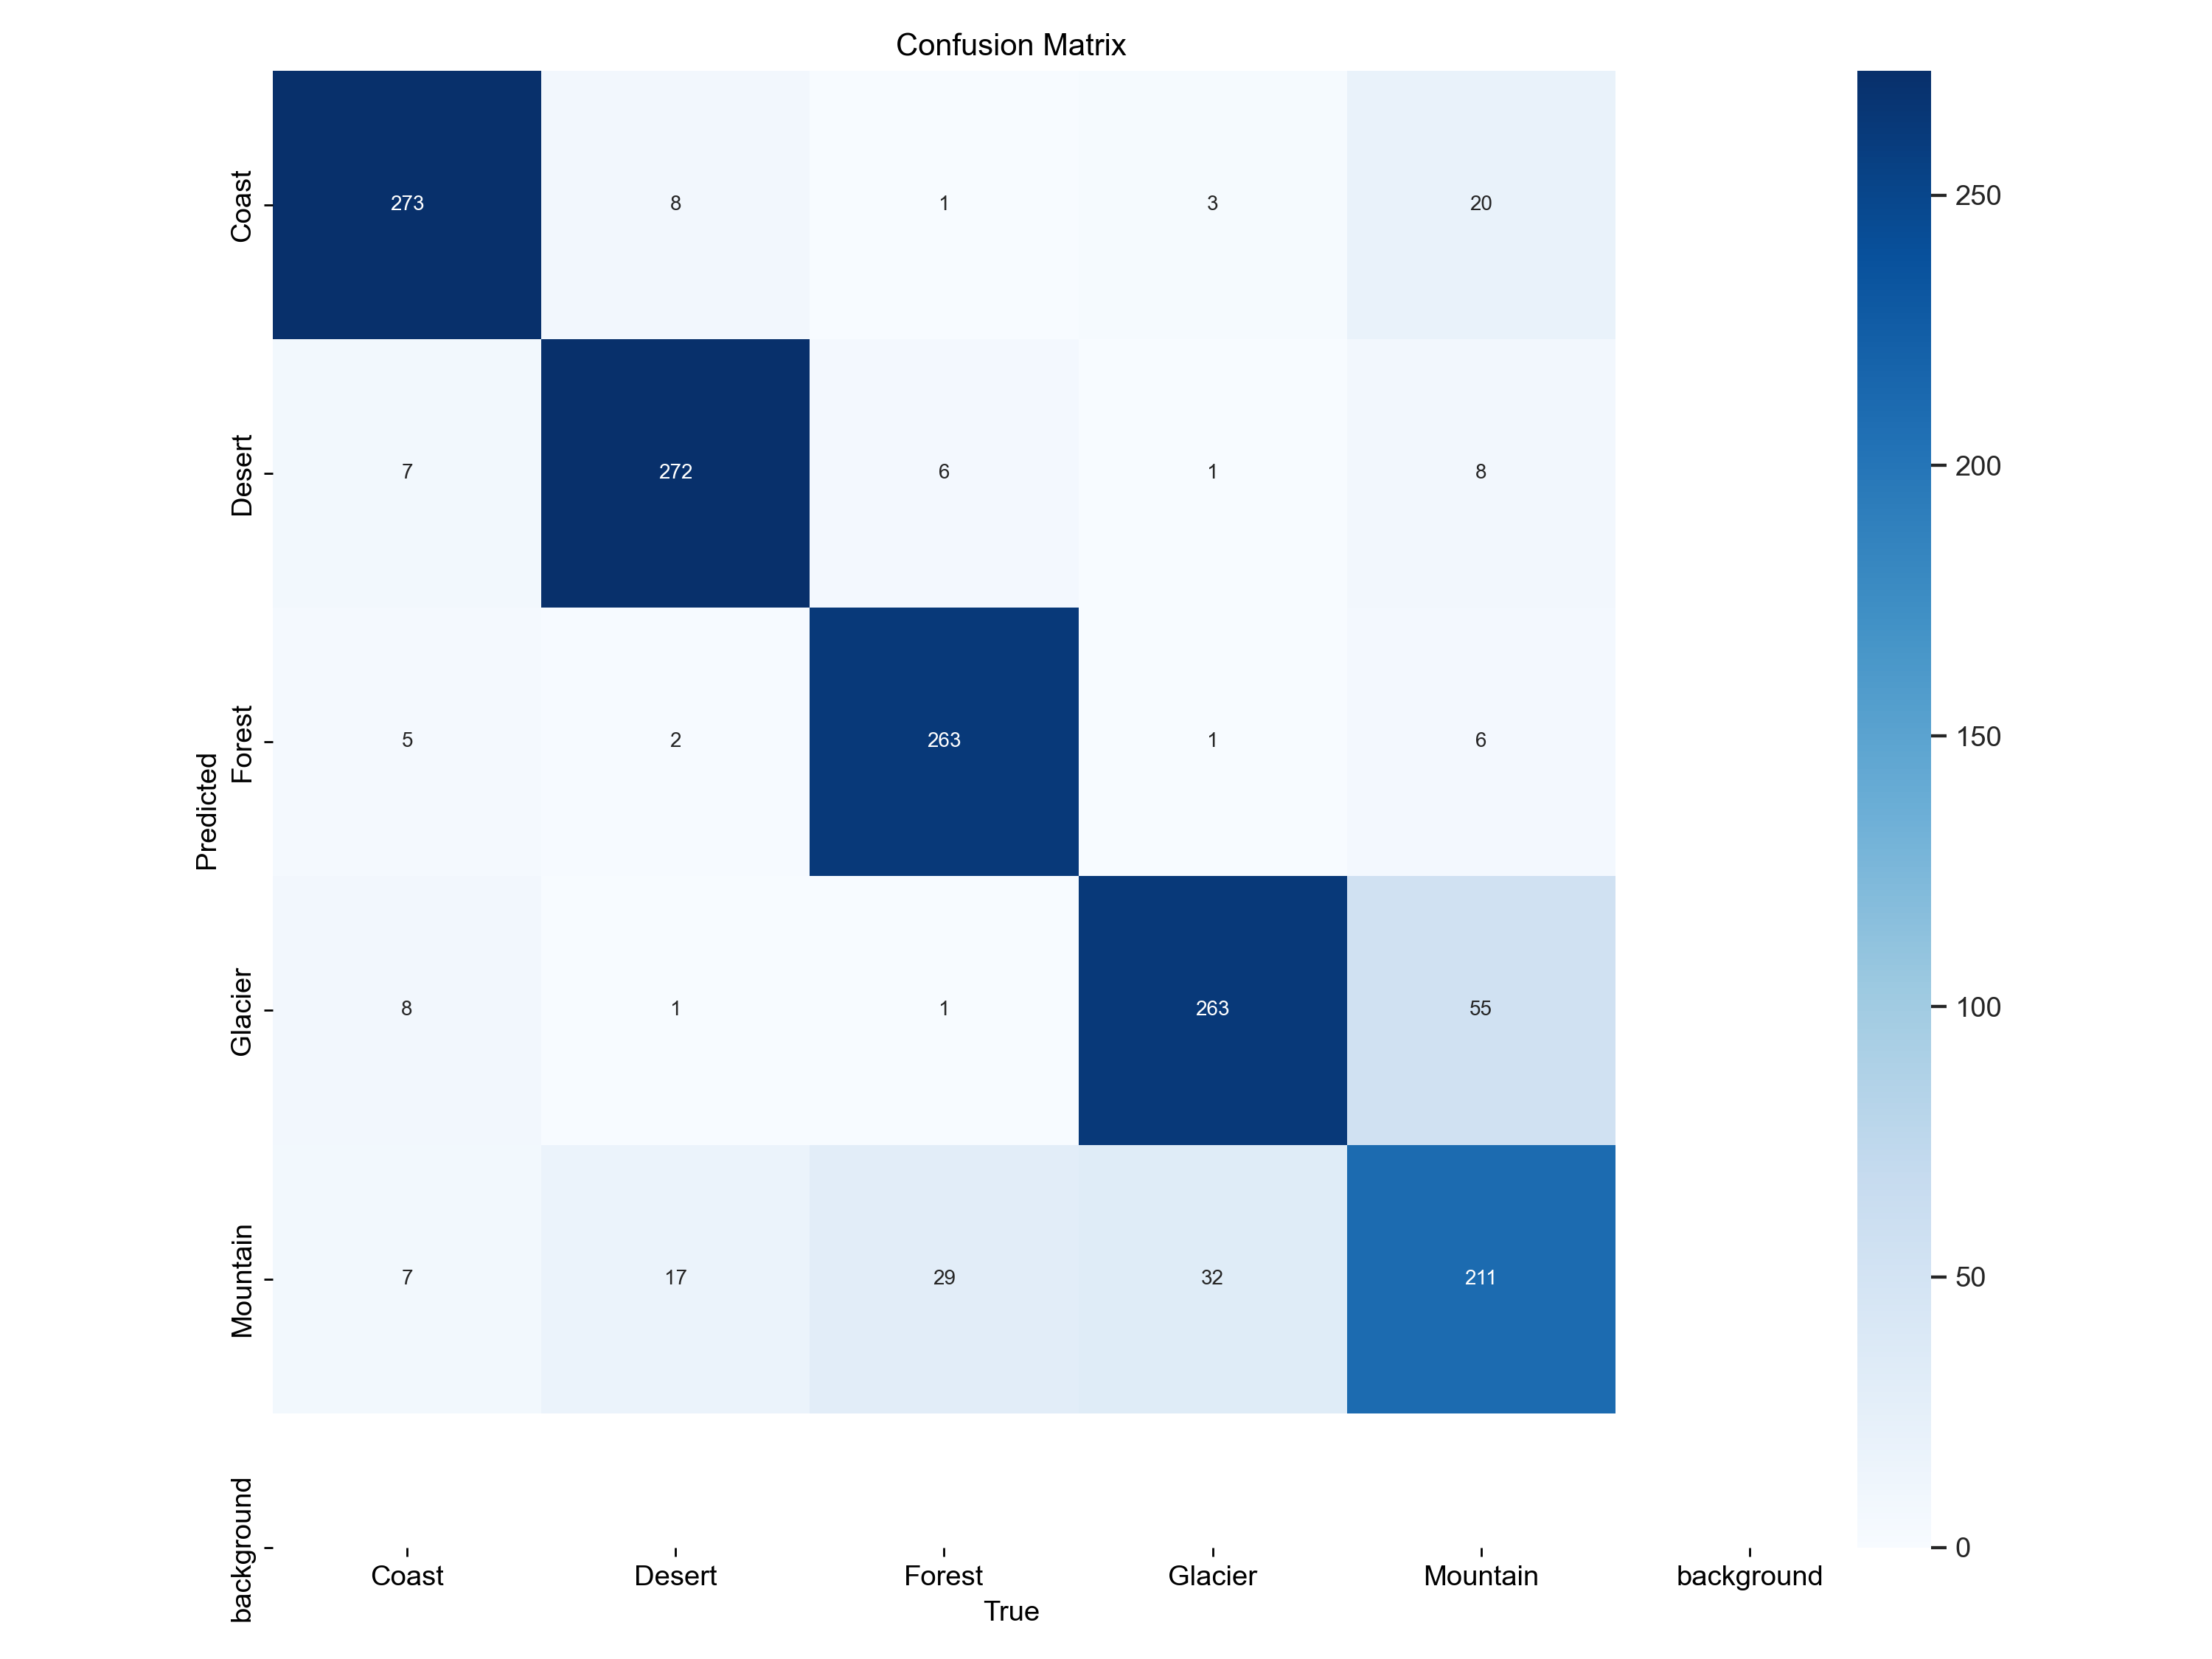



Confusion Matrix Normalized


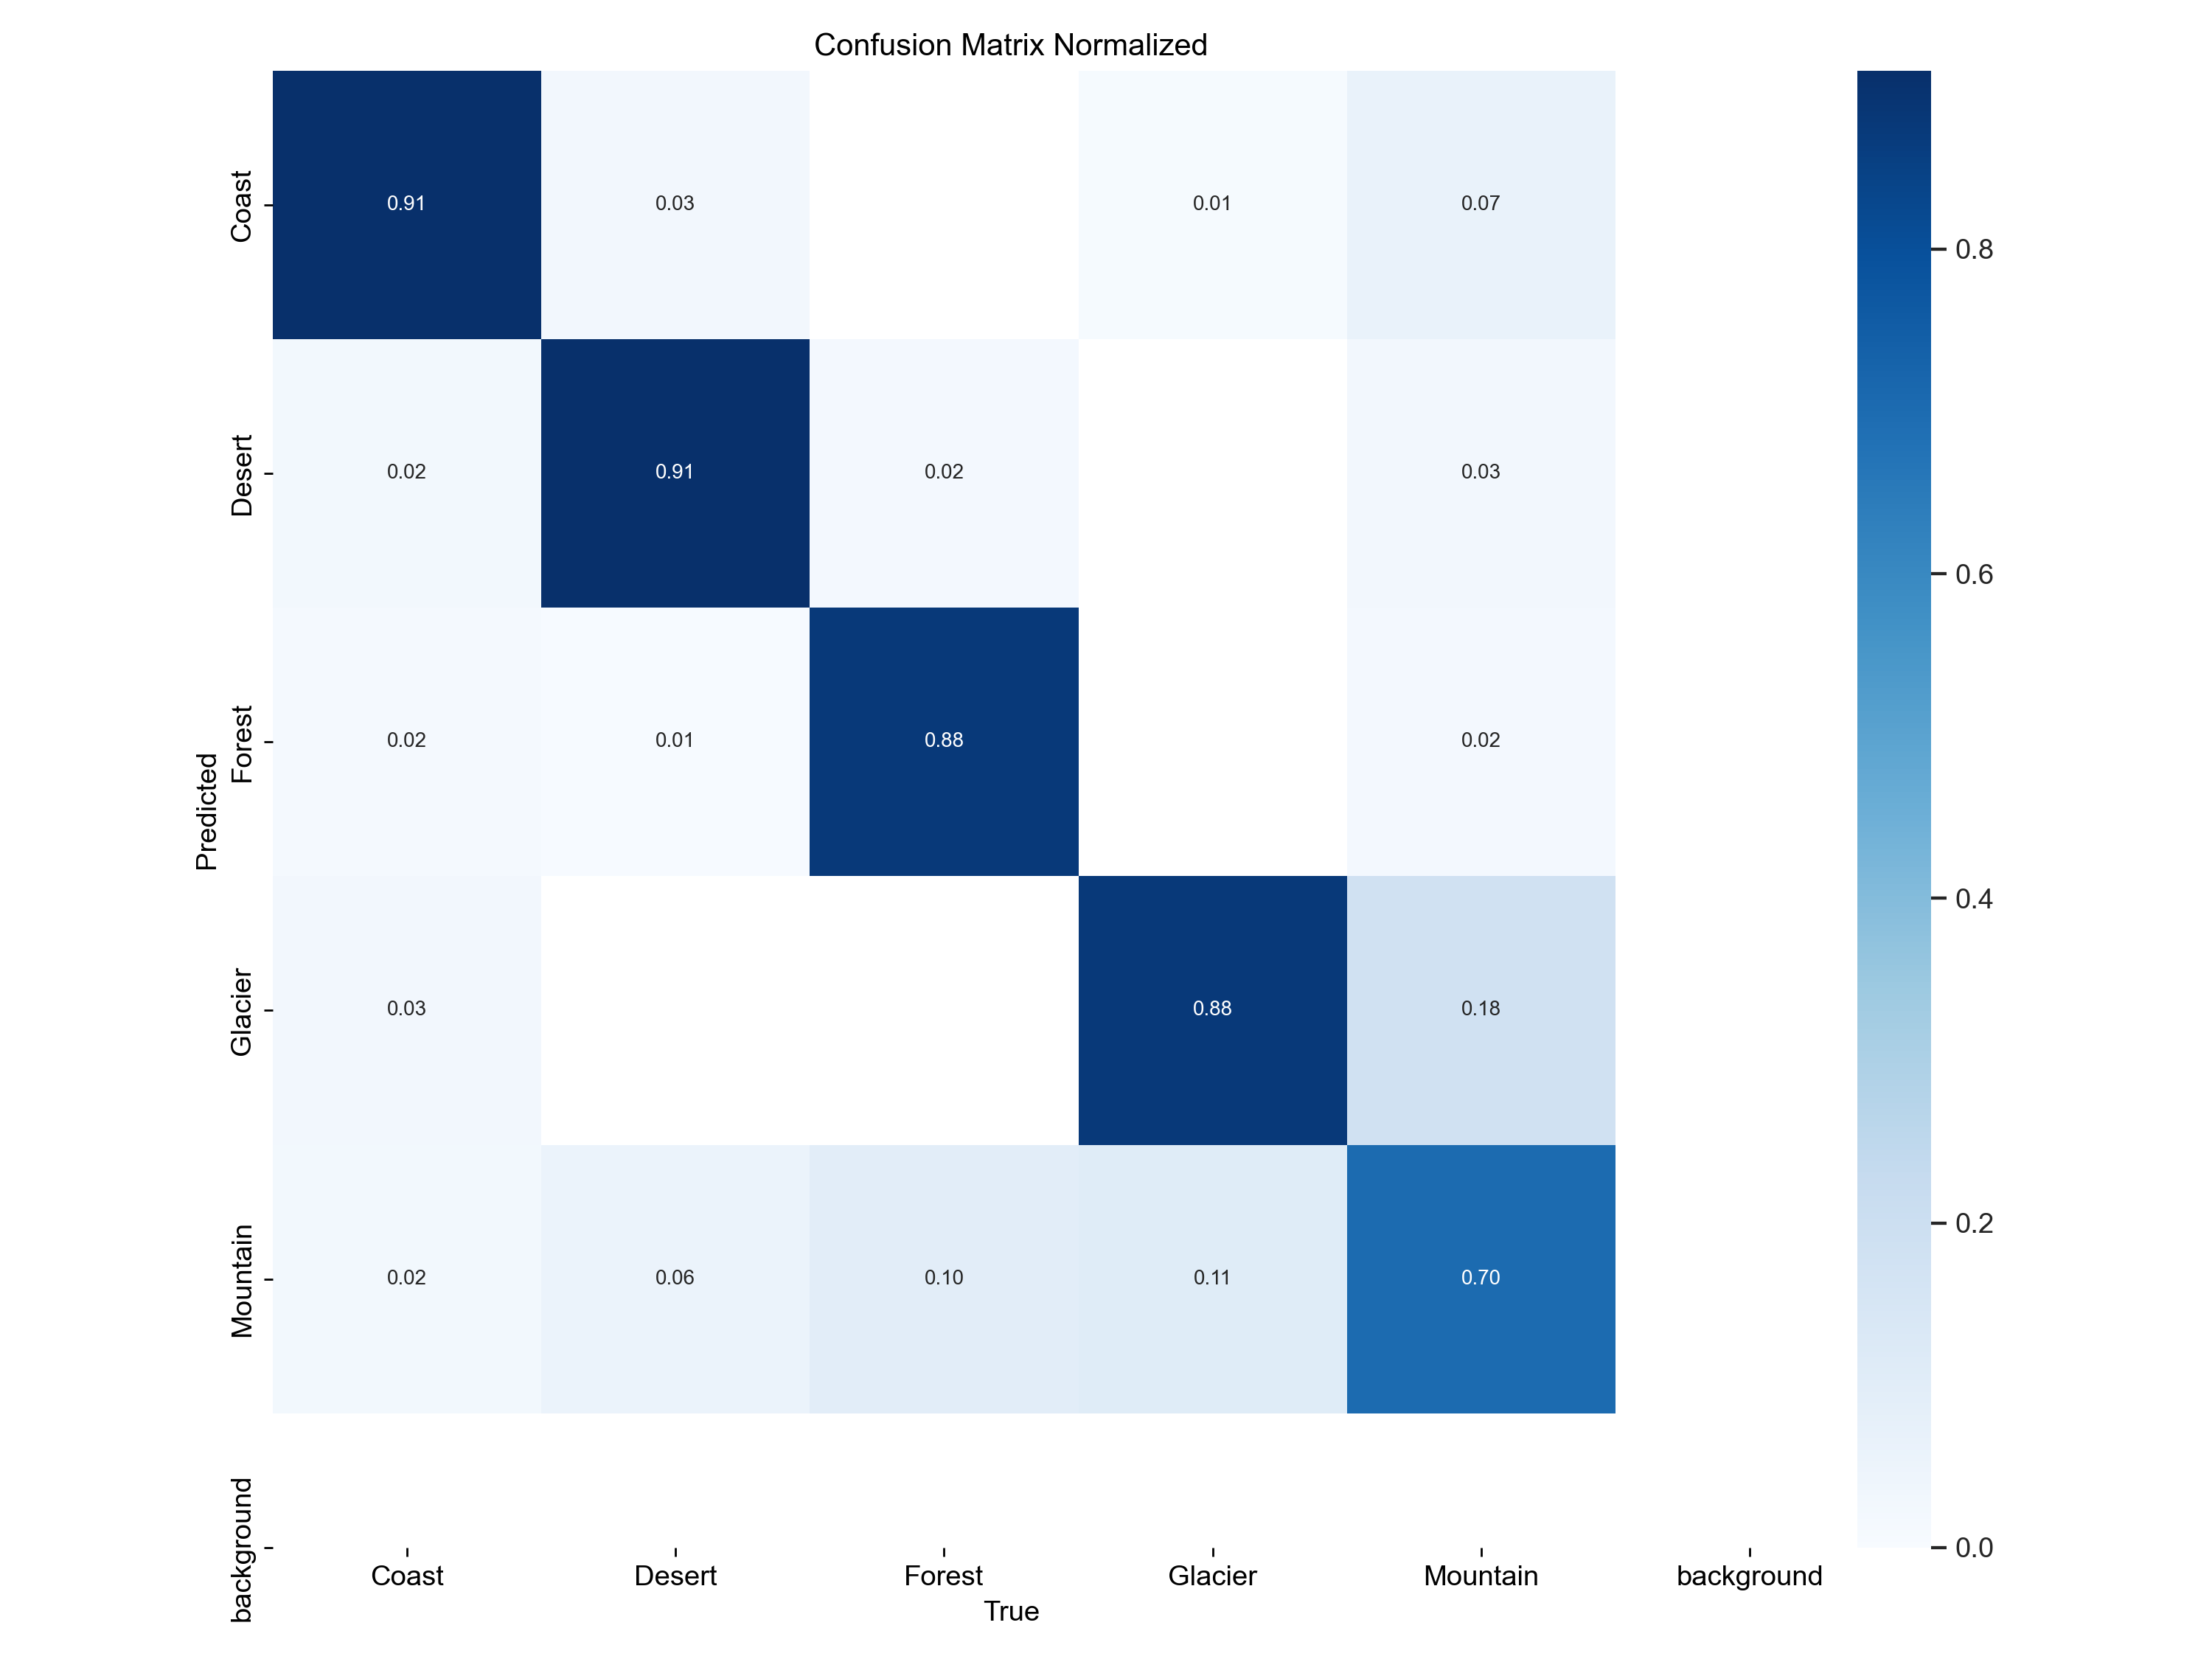

In [20]:
test_data_path = "../../Dataset/Landscape Classification"

# Comment or Uncomment the line to disbale or enable validation
!yolo task=classify mode=val model= "/home/mohanakrishna/Development/GSSoC/terrain classification/Model/Yolov8/runs/classify/train3/weights/best.pt" data="{test_data_path}"

# Display the results
val_results_path = "./runs/classify/val"

# Load the Confusion Matrix results
for image_path in glob(f"{val_results_path}/*.png")[:3]:
    if "confusion_matrix" in image_path:
        if "normalized" in image_path:
            print("Confusion Matrix Normalized")
        else:
            print("Confusion Matrix")
        display(Image(filename=image_path, width=600))
        print("\n")

### Inference


image 1/1 /home/mohanakrishna/Development/GSSoC/terrain classification/Model/Yolov8/../../Images/Desert-Test (10).jpeg: 224x224 Desert 1.00, Mountain 0.00, Glacier 0.00, Coast 0.00, Forest 0.00, 0.8ms
Speed: 3.8ms preprocess, 0.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


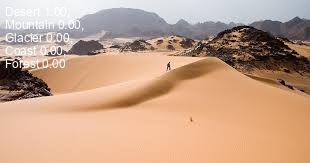

In [12]:
image_path = "../../Images/Desert-Test (10).jpeg"


model = YOLO("./runs/classify/train3/weights/best.pt")

# use with stream for better memory efficiency
results = model.predict(
    source=image_path, conf=0.5, imgsz=224, classes=[0, 1, 2, 3, 4], stream=True
)

for result in results:
    result.save(filename="result.jpg")

for image_path in glob(f"./*.jpg")[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")